### Data Processing

In [13]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
import os

In [7]:
def removeSubject(text):
    text = text.replace("Subject:", "")
    return text

def subContent(subject, content):
    return subject + " " + content

def clean_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    cleaned_text = " ".join(words)
    return cleaned_text

In [8]:
df = pd.read_csv("spam_mail.csv")

In [9]:
df["Subject"] = df["Subject"].apply(lambda x:removeSubject(x))
df["content"] = df["Subject"] + " " + df["Content"]
df = df.drop(columns = ["Subject", "Content"])
df

,evaluation,content
0,1,buy prescripiton pills boulder rendition wing...
1,0,re : swift - october 2000 vols done\ndaren j ...
2,0,eastrans nomination change effective 9 / 26 /...
3,0,weekend oncall notes friday 1 / 19 / 01 - rec...
4,0,"re : hello hello vince ,\nhow are you this we..."
...,...,...
27144,1,shipping worldwide the best medication around...
27145,0,"calpine daily gas nomination julie , we shoul..."
27146,0,fw : untangle financial jargon good one for u...
27147,0,upcoming risk management policy changes attac...


In [10]:
df['content'] = df['content'].apply(lambda x:clean_text(str(x)))

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [14]:
import shutil
train_folder = 'train_data'
valid_folder = 'valid_data'
test_folder = 'test_data'
os.makedirs(train_folder, exist_ok=True)
os.makedirs(valid_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [15]:
train_df['content'].to_csv(os.path.join(train_folder, 'sentences.txt'), index=False, header = False)
train_df['evaluation'].to_csv(os.path.join(train_folder, 'label.txt'), index=False, header = False)
valid_df['content'].to_csv(os.path.join(valid_folder, 'sentences.txt'), index=False, header = False)
valid_df['evaluation'].to_csv(os.path.join(valid_folder, 'label.txt'), index=False, header = False)
test_df['content'].to_csv(os.path.join(test_folder, 'sentences.txt'), index=False, header = False)
test_df['evaluation'].to_csv(os.path.join(test_folder, 'label.txt'), index=False, header = False)

### Modeling

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
def load_data(directory):
    sentences_path = os.path.join(directory, 'sentences.txt')
    labels_path = os.path.join(directory, 'label.txt')

    with open(sentences_path, 'r', encoding='utf-8') as file:
        sentences = file.readlines()

    with open(labels_path, 'r', encoding='utf-8') as file:
        labels = [int(line.strip()) for line in file]

    return sentences, labels

train_directory = 'train_data'
train_sentences, train_labels = load_data(train_directory)
test_directory = 'test_data'
test_sentences, test_labels = load_data(test_directory)
valid_directory = 'valid_data'
valid_sentences, valid_labels = load_data(valid_directory)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(train_sentences)
X_test_vec = vectorizer.transform(test_sentences)
X_valid_vec = vectorizer.transform(valid_sentences)

### Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42) 

model.fit(X_train_vec, train_labels)

y_test_pred = model.predict(X_test_vec)
y_valid_pred = model.predict(X_valid_vec)

test_accuracy = accuracy_score(test_labels, y_test_pred)
valid_accuracy = accuracy_score(valid_labels, y_valid_pred)

test_f1 = f1_score(test_labels, y_test_pred)
valid_f1 = f1_score(valid_labels, y_valid_pred)

test_conf_matrix = confusion_matrix(test_labels, y_test_pred)
valid_conf_matrix = confusion_matrix(valid_labels, y_valid_pred)

cv_accuracy = cross_val_score(model, X_train_vec, train_labels, cv=5, scoring='accuracy').mean()
cv_f1 = cross_val_score(model, X_train_vec, train_labels, cv=5, scoring='f1').mean()

print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)
print("Test Confusion Matrix:\n", test_conf_matrix)

print("\nValidation Accuracy:", valid_accuracy)
print("Validation F1 Score:", valid_f1)
print("Validation Confusion Matrix:\n", valid_conf_matrix)

print("\nCross-Validation Accuracy:", cv_accuracy)
print("Cross-Validation F1 Score:", cv_f1)

Test Accuracy: 0.9833046894181193
Test F1 Score: 0.9838786154575629
Test Confusion Matrix:
 [[1930   43]
 [  25 2075]]

Validation Accuracy: 0.9833005893909627
Validation F1 Score: 0.9843317972350231
Validation Confusion Matrix:
 [[1868   38]
 [  30 2136]]

Cross-Validation Accuracy: 0.9840031986042455
Cross-Validation F1 Score: 0.9844171446106997


### Support Vector Machine

In [6]:
from sklearn.svm import SVC

model = SVC(kernel='linear')  

model.fit(X_train_vec, train_labels)

y_test_pred = model.predict(X_test_vec)
y_valid_pred = model.predict(X_valid_vec)

test_accuracy = accuracy_score(test_labels, y_test_pred)
valid_accuracy = accuracy_score(valid_labels, y_valid_pred)

test_f1 = f1_score(test_labels, y_test_pred)
valid_f1 = f1_score(valid_labels, y_valid_pred)

test_conf_matrix = confusion_matrix(test_labels, y_test_pred)
valid_conf_matrix = confusion_matrix(valid_labels, y_valid_pred)

cv_accuracy = cross_val_score(model, X_train_vec, train_labels, cv=5, scoring='accuracy').mean()
cv_f1 = cross_val_score(model, X_train_vec, train_labels, cv=5, scoring='f1').mean()

print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)
print("Test Confusion Matrix:\n", test_conf_matrix)

print("\nValidation Accuracy:", valid_accuracy)
print("Validation F1 Score:", valid_f1)
print("Validation Confusion Matrix:\n", valid_conf_matrix)

print("\nCross-Validation Accuracy:", cv_accuracy)
print("Cross-Validation F1 Score:", cv_f1)

Test Accuracy: 0.9808494966854898
Test F1 Score: 0.9814462416745957
Test Confusion Matrix:
 [[1932   41]
 [  37 2063]]

Validation Accuracy: 0.9820726915520629
Validation F1 Score: 0.9831603229527106
Validation Confusion Matrix:
 [[1868   38]
 [  35 2131]]

Cross-Validation Accuracy: 0.9799516193799416
Cross-Validation F1 Score: 0.9804566353782812


### Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, train_labels)

y_test_pred = model.predict(X_test_vec)
y_valid_pred = model.predict(X_valid_vec)

test_accuracy = accuracy_score(test_labels, y_test_pred)
valid_accuracy = accuracy_score(valid_labels, y_valid_pred)

test_f1 = f1_score(test_labels, y_test_pred)
valid_f1 = f1_score(valid_labels, y_valid_pred)

test_conf_matrix = confusion_matrix(test_labels, y_test_pred)
valid_conf_matrix = confusion_matrix(valid_labels, y_valid_pred)

cv_accuracy = cross_val_score(model, X_train_vec, train_labels, cv=5, scoring='accuracy').mean()
cv_f1 = cross_val_score(model, X_train_vec, train_labels, cv=5, scoring='f1').mean()

print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)
print("Test Confusion Matrix:\n", test_conf_matrix)

print("\nValidation Accuracy:", valid_accuracy)
print("Validation F1 Score:", valid_f1)
print("Validation Confusion Matrix:\n", valid_conf_matrix)

print("\nCross-Validation Accuracy:", cv_accuracy)
print("Cross-Validation F1 Score:", cv_f1)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.985268843604223
Test F1 Score: 0.9858088930936613
Test Confusion Matrix:
 [[1929   44]
 [  16 2084]]

Validation Accuracy: 0.9867387033398821
Validation F1 Score: 0.9875576036866359
Validation Confusion Matrix:
 [[1875   31]
 [  23 2143]]

Cross-Validation Accuracy: 0.9852661764909512
Cross-Validation F1 Score: 0.9856808364561493


### LSTM Model

#### Create Vocabulary

In [1]:
import torch
from tqdm import tqdmm
from nltk.tokenize import word_tokenize

class Vocabulary:
    def __init__(self):
        self.word2id = dict()
        self.word2id['<pad>'] = 0  
        self.word2id['<unk>'] = 1
        self.unk_id = self.word2id['<unk>']
        self.id2word = {v: k for k, v in self.word2id.items()}

    def __getitem__(self, word):
        return self.word2id.get(word, self.unk_id)

    def __contains__(self, word):                               
        return word in self.word2id 
    
    def __len__(self):
        return len(self.word2id)

    def lookup_tokens(self, word_indexes: list):
        return [self.id2word[word_index] for word_index in word_indexes]

    def add(self, word):
        if word not in self:
            word_index = self.word2id[word] = len(self.word2id)
            self.id2word[word_index] = word
            return word_index
        else:
            return self[word]

    @staticmethod
    def tokenize_corpus(corpus):
        tokenized_corpus = list()
        for document in tqdm(corpus):
            tokenized_document = [word.replace(" ", "_") for word in word_tokenize(document)]
            tokenized_corpus.append(tokenized_document)

        return tokenized_corpus

    def corpus_to_tensor(self, corpus, is_tokenized=False):
        if is_tokenized:
            tokenized_corpus = corpus
        else:
            tokenized_corpus = self.tokenize_corpus(corpus)
        indicies_corpus = list()
        for document in tqdm(tokenized_corpus):
            indicies_document = torch.tensor(list(map(lambda word: self[word], document)), dtype=torch.int64)
            indicies_corpus.append(indicies_document)

        return indicies_corpus

    def tensor_to_corpus(self, tensor):
        corpus = list()
        for indicies in tqdm(tensor):
            document = list(map(lambda index: self.id2word[index.item()], indicies))
            corpus.append(document)

        return corpus

#### Get Pretrained Word2Vec

In [2]:
import torch
from torchtext.vocab import Vectors

def get_pretrained_word2vec(fpath):
    return Vectors(name=fpath, unk_init=torch.Tensor.normal_)

def create_vocab_from_word2vec(word_embedding):
    vocab = Vocabulary()
    words_list = list(word_embedding.stoi.keys())
    for word in words_list:
        vocab.add(word)
    return vocab

In [3]:
word_embeddings = get_pretrained_word2vec('model\glove.6B.100d.txt')

In [4]:
vocabulary = create_vocab_from_word2vec(word_embeddings)

In [5]:
def load_text_file(path):
    with open(path, encoding = 'utf-8') as f:
        lines = [line.rstrip() for line in f]
    return lines

#### Data Loader

In [6]:
import os
import torch
from torch.utils.data import Dataset
class Dataset(Dataset):
    def __init__(self, vocab, fpath=None, tokenized_fpath=None):
        self.vocab = vocab
        self.pad_idx = vocab["<pad>"]
        self.sentences = load_text_file(os.path.join(fpath, "sentences.txt"))
        self.sentiments = load_text_file(os.path.join(fpath, "label.txt"))
        sentiments_type = list(set(self.sentiments))
        sentiments_type.sort()
        self.sentiment2id = {sentiment: i for i, sentiment in enumerate(sentiments_type)}
        if tokenized_fpath:
            self.tokenized_sentences = torch.load(tokenized_fpath)
        else:
            self.tokenized_sentences = self.vocab.tokenize_corpus(self.sentences)

        self.tensor_data = self.vocab.corpus_to_tensor(self.tokenized_sentences, is_tokenized=True)
        self.tensor_label = torch.tensor([self.sentiment2id[sentiment] for sentiment in self.sentiments],
                                          dtype=torch.long)
    def __len__(self):
        return len(self.tensor_data)

    def __getitem__(self, idx):
        return self.tensor_data[idx], self.tensor_label[idx]

    def collate_fn(self, examples):
        examples = sorted(examples, key=lambda e: len(e[0]), reverse=True)

        feedbacks = [e[0] for e in examples]
        # padding tokens
        feedbacks = torch.nn.utils.rnn.pad_sequence(feedbacks, 
                                                    batch_first=True, 
                                                    padding_value=self.pad_idx)
        
        feedback_lengths = torch.tensor([len(e[0]) for e in examples])
        sentiments = torch.tensor([e[1] for e in examples])

        return {"inputs": (feedbacks, feedback_lengths), "labels": sentiments} 

In [7]:
train_dataset = Dataset(vocab=vocabulary, fpath="train_data")
valid_dataset = Dataset(vocab=vocabulary, fpath="valid_data")
test_dataset = Dataset(vocab=vocabulary, fpath="test_data")

100%|███████████████████████████████████████████████████████| 4073/4073 [00:00<00:00, 27488.96it/s]


In [8]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=16, collate_fn=train_dataset.collate_fn)
val_dataloader = DataLoader(valid_dataset, batch_size=16, collate_fn=valid_dataset.collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=16, collate_fn=test_dataset.collate_fn)

In [8]:
classes = ['non-spam', 'spam']

#### LSTM Structure

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, n_layers, n_labels, bidirectional, dropout, pad_idx):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx) # embedding layer
        self.bn = nn.BatchNorm1d(embedding_dim)

        self.lstm = nn.LSTM(embedding_dim, 
                            hidden_dim, 
                            num_layers=n_layers, 
                            bidirectional=bidirectional, 
                            dropout=dropout)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, n_labels)

        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        embeds = self.embedding(text) 
        bn_embeds = self.bn(embeds.permute(0,2,1)).permute(0,2,1)
        output, (hidden, cell) = self.lstm(bn_embeds.permute(1,0,2)) # (C, B, H)
        last_hidden = output[-1] # 1,....,T
        last_hidden = self.dropout(last_hidden)
        
        return self.fc(last_hidden)

### Training, Evaluation Function

In [10]:
def train(model, dataloader, optimizer, criterion, device):
    epoch_loss = 0
    total = 0
    correct = 0
    
    model.train()
    
    for batch in (pbar:=tqdm(dataloader)):
        optimizer.zero_grad() # clear the gradient
        feedbacks, _ = batch["inputs"]
        feedbacks = feedbacks.to(device)
        logits = model(feedbacks)
        labels = batch["labels"].to(device)
        loss = criterion(logits, labels)
        
        # make prediction
        _, preds = torch.max(logits, dim=1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
        
        # backward pass and update params
        loss.backward()    
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 0.3)
        optimizer.step()
        
        pbar.set_postfix(loss=loss.item(), accuracy=correct/total)
        epoch_loss += loss.item()
    
    batch_num = len(dataloader)
    return epoch_loss / batch_num, correct / total

def evaluate(model, dataloader, criterion, device):
    epoch_loss = 0
    total = 0
    correct = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch in dataloader:
            feedbacks, _ = batch["inputs"]
            feedbacks = feedbacks.to(device)
            logits = model(feedbacks)
            labels = batch["labels"].to(device)
            loss = criterion(logits, labels)  
            _, preds = torch.max(logits, dim=1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            epoch_loss += loss.item()
        
    batch_num = len(dataloader)
    return epoch_loss / batch_num, correct / total


def evaluate_test(model, dataloader, criterion, device):
    model.eval()
    correct = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in dataloader:
            feedbacks, _ = batch["inputs"]
            feedbacks = feedbacks.to(device)
            logits = model(feedbacks)
            labels = batch["labels"].to(device)
            loss = criterion(logits, labels)
            _, preds = torch.max(logits, dim=1)
            correct += (preds == labels).sum().item()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = correct / len(dataloader.dataset)
    return accuracy, all_preds, all_labels


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def train_(num_epochs, model, train_loader, optim, loss_fn, device):
    best_valid_loss = float("inf")
    recall = {'train_loss':[],
          'train_acc':[],
          'valid_loss':[],
          'valid_acc':[]}
    for epoch in range(num_epochs):
        start_time = time.time()
        train_loss, train_acc = train(model, train_loader, optim, loss_fn, device)
        valid_loss, valid_acc = evaluate(model, val_dataloader, loss_fn, device)
        end_time = time.time()
        recall['train_loss'].append(train_loss)
        recall['train_acc'].append(train_acc)
        recall['valid_loss'].append(valid_loss)
        recall['valid_acc'].append(valid_acc)

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        print(f"Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s")
        print(f"\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%")
        print(f"\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%")
    return recall

In [11]:
def get_model(vocab, word_embedding, embedding_dim, hidden_dim, n_layers, n_labels, bidirectional, dropout, device=None):
    input_dim = word_embedding.vectors.shape[0]
    unk_idx = vocab["<unk>"]
    pad_idx = vocab["<pad>"]
    model = CustomLSTM(input_dim, embedding_dim, hidden_dim,  n_layers, n_labels, bidirectional, dropout, pad_idx)
    model.embedding.weight.data.copy_(word_embedding.vectors)
    model.embedding.weight.data[unk_idx] = torch.zeros(embedding_dim)
    model.embedding.weight.data[pad_idx] = torch.zeros(embedding_dim)
    model.to(device)
    return model

#### Training

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = get_model(vocab=vocabulary, word_embedding=word_embeddings, embedding_dim=100, 
              hidden_dim=256, n_layers= 3, n_labels=2, bidirectional=True, dropout=0.3, device=device)
optim = torch.optim.AdamW(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
recall = train_(10, model, train_dataloader, optim, loss_fn, device)

100%|██████████████████████████████| 1188/1188 [03:13<00:00,  6.14it/s, accuracy=0.522, loss=0.647]


Epoch: 01 | Epoch Time: 3m 26s
	Train Loss: 0.679 | Train Acc: 52.25%
	 Val. Loss: 0.681 |  Val. Acc: 49.80%


100%|██████████████████████████████| 1188/1188 [03:13<00:00,  6.15it/s, accuracy=0.552, loss=0.638]


Epoch: 02 | Epoch Time: 3m 25s
	Train Loss: 0.657 | Train Acc: 55.23%
	 Val. Loss: 0.674 |  Val. Acc: 50.00%


100%|███████████████████████████████| 1188/1188 [03:15<00:00,  6.08it/s, accuracy=0.629, loss=0.21]


Epoch: 03 | Epoch Time: 3m 28s
	Train Loss: 0.591 | Train Acc: 62.95%
	 Val. Loss: 0.246 |  Val. Acc: 90.57%


100%|██████████████████████████████| 1188/1188 [03:15<00:00,  6.09it/s, accuracy=0.966, loss=0.022]


Epoch: 04 | Epoch Time: 3m 27s
	Train Loss: 0.109 | Train Acc: 96.62%
	 Val. Loss: 0.073 |  Val. Acc: 97.91%


100%|████████████████████████████| 1188/1188 [03:17<00:00,  6.02it/s, accuracy=0.989, loss=0.00255]


Epoch: 05 | Epoch Time: 3m 30s
	Train Loss: 0.041 | Train Acc: 98.93%
	 Val. Loss: 0.067 |  Val. Acc: 97.96%


100%|███████████████████████████| 1188/1188 [03:17<00:00,  6.02it/s, accuracy=0.994, loss=0.000768]


Epoch: 06 | Epoch Time: 3m 30s
	Train Loss: 0.021 | Train Acc: 99.42%
	 Val. Loss: 0.063 |  Val. Acc: 98.40%


100%|███████████████████████████| 1188/1188 [03:18<00:00,  5.99it/s, accuracy=0.996, loss=0.000248]


Epoch: 07 | Epoch Time: 3m 31s
	Train Loss: 0.015 | Train Acc: 99.62%
	 Val. Loss: 0.079 |  Val. Acc: 98.53%


100%|███████████████████████████| 1188/1188 [03:18<00:00,  5.98it/s, accuracy=0.997, loss=0.000509]


Epoch: 08 | Epoch Time: 3m 31s
	Train Loss: 0.010 | Train Acc: 99.74%
	 Val. Loss: 0.075 |  Val. Acc: 98.06%


100%|███████████████████████████| 1188/1188 [03:18<00:00,  5.99it/s, accuracy=0.998, loss=0.000184]


Epoch: 09 | Epoch Time: 3m 31s
	Train Loss: 0.007 | Train Acc: 99.83%
	 Val. Loss: 0.071 |  Val. Acc: 98.53%


100%|████████████████████████████| 1188/1188 [03:15<00:00,  6.08it/s, accuracy=0.999, loss=9.42e-5]


Epoch: 10 | Epoch Time: 3m 28s
	Train Loss: 0.005 | Train Acc: 99.88%
	 Val. Loss: 0.086 |  Val. Acc: 98.67%


In [13]:
torch.save(model.state_dict(), 'LSTM_model.pth')

In [16]:
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def plot_acc_loss(recall):
    epochs = range(1, len(recall['train_loss']) + 1)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, recall['train_loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, recall['valid_loss'], 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, recall['train_acc'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, recall['valid_acc'], 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def calculate_metrics(preds, labels):
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return accuracy, f1

def predict(model, vocab, device, input_text):
    model.eval()
    model.to(device)
    tokens = vocab.corpus_to_tensor([input_text])[0].view(1,-1)
    tokens = tokens.to(device)
    with torch.no_grad():
        logits = model(tokens)
        _, preds = torch.max(logits, dim=-1)
        print(preds)
    return preds

In [18]:
from sklearn.metrics import confusion_matrix

def evaluate_test_confusion(model, dataloader, criterion, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in dataloader:
            feedbacks, _ = batch["inputs"]
            feedbacks = feedbacks.to(device)
            logits = model(feedbacks)
            labels = batch["labels"].to(device)
            loss = criterion(logits, labels)
            
            _, preds = torch.max(logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    confusion_mat = confusion_matrix(all_labels, all_preds)
    
    return confusion_mat


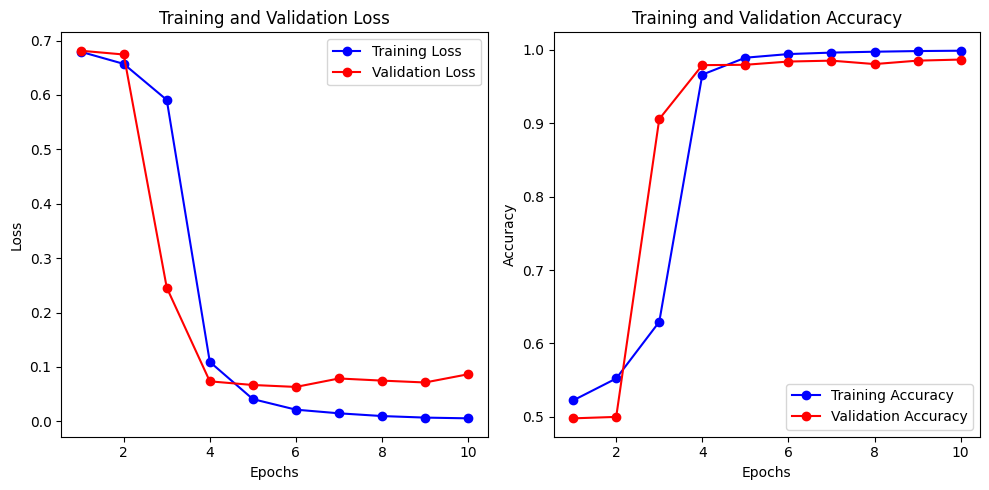

accuracy: 0.98502332433096
f1_score: 0.9850224765966307


In [17]:
test_loss, test_preds, test_labels = evaluate_test(model, test_dataloader, loss_fn, device)
test_acc, test_f1 = calculate_metrics(test_preds, test_labels)
plot_acc_loss(recall)
print(f'accuracy: {test_acc}')
print(f'f1_score: {test_f1}')

The plot show the training process is very good

In [20]:
confusion_matrix = evaluate_test_confusion(model, test_dataloader, loss_fn, device)

In [154]:
confusion_matrix

array([[1939,   34],
       [  27, 2073]], dtype=int64)

#### Confusion Matrix Of Best Model

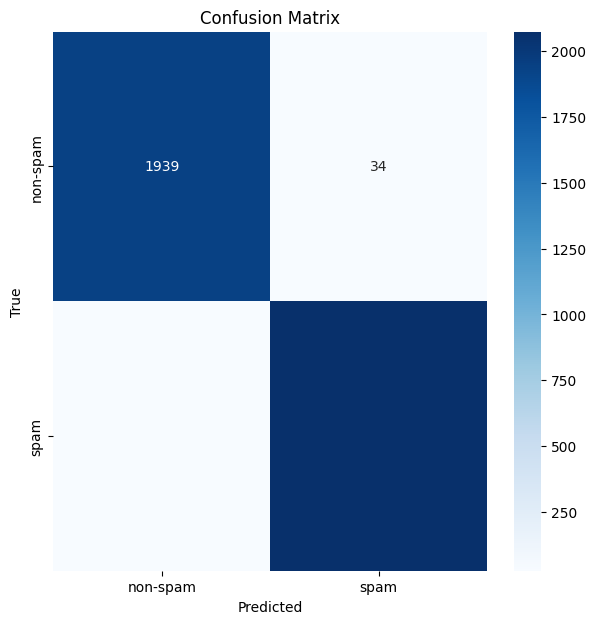

In [29]:
import seaborn as sns

plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['non-spam', 'spam'], yticklabels=['non-spam', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
import torch.nn.functional as F
def predict(model, vocab, device, input_text):
    model.eval()
    model.to(device)
    tokens = vocab.corpus_to_tensor([input_text])[0].view(1,-1)
    tokens = tokens.to(device)
    with torch.no_grad():
        logits = model(tokens)
        _, preds = torch.max(logits, dim=-1)
        probability_tensor = F.softmax(logits, dim=1)
    return preds, probability_tensor, tokens

### Testing

In [176]:
input_text = "hello"
classes[predict(model, vocabulary, device, input_text)[0]]

100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

tensor([[ 1.5403, -1.3365]], device='cuda:0')


'non-spam'

In [179]:
input_text = "dasdasdsafasjhigoajaio"
classes[predict(model, vocabulary, device, input_text)[0]]

100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

tensor([[-4.9721,  5.0523]], device='cuda:0')


'spam'

In [187]:
input_text = "i wanted to extend my thanks for you"
classes[predict(model, vocabulary, device, input_text)[0]]

100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 996.98it/s]

tensor([[ 3.3197, -2.9680]], device='cuda:0')


'non-spam'

### Load Model

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = get_model(vocab=vocabulary, word_embedding=word_embeddings, embedding_dim=100, 
              hidden_dim=256, n_layers= 3, n_labels=2, bidirectional=True, dropout=0.3, device=device)

In [ ]:
model.load_state_dict(torch.load("LSTM_model.pth"))

In [14]:
predict(model, vocabulary, device, 'hello, buy this please')

100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 665.55it/s]


(tensor([1], device='cuda:0'),
 tensor([[0.1694, 0.8306]], device='cuda:0'),
 tensor([[13077,     3,   989,    39,  3834]], device='cuda:0'))

### Conclusion

|           | Random Forest | SVM   | Logistic Regression | LSTM  |
|-----------|---------------|-------|---------------------|-------|
| Accuracy  | 0.983         | 0.980 | 0.985               | 0.985 |
| F1-Score  | 0.983         | 0.981 | 0.985               | 0.985 |


**Random Forest:**

*Pros:*
- Robust and versatile, suitable for various types of data and tasks.
- Handles non-linearity and interactions well.
- Reduces overfitting by averaging multiple decision trees.

*Cons:*
- Can be computationally expensive for large datasets.
- Lack of interpretability compared to simpler models.

**Support Vector Machine (SVM):**

*Pros:*
- Effective in high-dimensional spaces, especially in situations where the number of features is greater than the number of samples.
- Works well for both linear and non-linear relationships, depending on the choice of the kernel.
- Memory efficient.

*Cons:*
- May be sensitive to the choice of kernel and hyperparameters.
- Can be computationally expensive, especially with large datasets.

**Logistic Regression:**

*Pros:*
- Simple and interpretable.
- Efficient, especially for binary classification tasks.
- Provides probability estimates.

*Cons:*
- Assumes a linear relationship between features and the log-odds of the response.
- May not perform well on complex, non-linear data.

**LSTM (Long Short-Term Memory):**

*Pros:*
- Effective for sequential data and time-series analysis.
- Captures long-term dependencies in data.
- Suitable for tasks involving natural language processing and speech recognition.

*Cons:*
- Computationally intensive, especially for training large networks.
- Requires a significant amount of data for training.
- May be prone to overfitting, and tuning hyperparameters is crucial.



choose LSTM when dealing with sequential data, such as time-series or natural language, and when capturing long-term dependencies is crucial.